In [2]:
import pandas as pd


## Data Loading
This section loads the IBM HR Analytics dataset into a pandas DataFrame
for further analysis.

In [3]:
df = pd.read_csv("../data/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("../data/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [6]:
df.shape

(1470, 35)

In [7]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [8]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

## Data Cleaning
Checks for missing values, duplicate records, and verifies data types
to ensure data quality.


In [9]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [10]:
df.duplicated().sum()

np.int64(0)

## Exploratory Data Analysis
Explores employee demographics and overall attrition trends using
summary statistics and visualizations.


In [11]:
df['Attrition'].value_counts(normalize=True) * 100

Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64

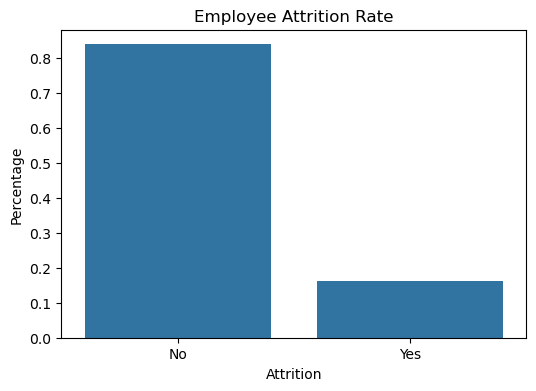

In [12]:
attrition = df['Attrition'].value_counts(normalize=True)

plt.figure(figsize=(6,4))
sns.barplot(x=attrition.index, y=attrition.values)
plt.title("Employee Attrition Rate")
plt.ylabel("Percentage")
plt.show()

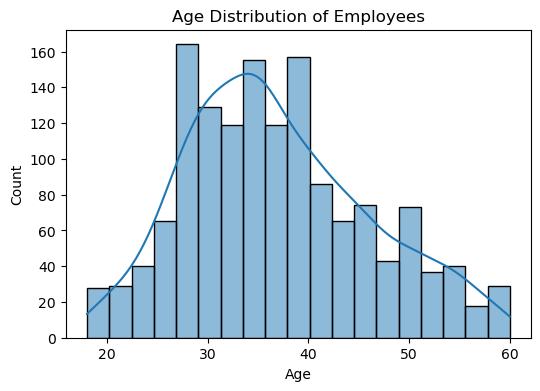

In [13]:
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution of Employees")
plt.show()

## Attrition Drivers Analysis
Analyzes key factors influencing employee attrition such as work-life
balance, overtime, department, and job role.

In [14]:
def calculate_attrition_rate(data, column):
    temp = data.groupby([column, 'Attrition']).size().unstack(fill_value=0)
    temp['AttritionRate'] = temp['Yes'] / temp.sum(axis=1) * 100
    return temp.reset_index()

In [15]:
calculate_attrition_rate(df, 'Gender')

Attrition,Gender,No,Yes,AttritionRate
0,Female,501,87,14.795918
1,Male,732,150,17.006803


In [16]:
calculate_attrition_rate(df, 'WorkLifeBalance')

Attrition,WorkLifeBalance,No,Yes,AttritionRate
0,1,55,25,31.250000
1,2,286,58,16.860465
2,3,766,127,14.221725
3,4,126,27,17.647059


In [17]:
calculate_attrition_rate(df, 'OverTime')

Attrition,OverTime,No,Yes,AttritionRate
0,No,944,110,10.436433
1,Yes,289,127,30.528846


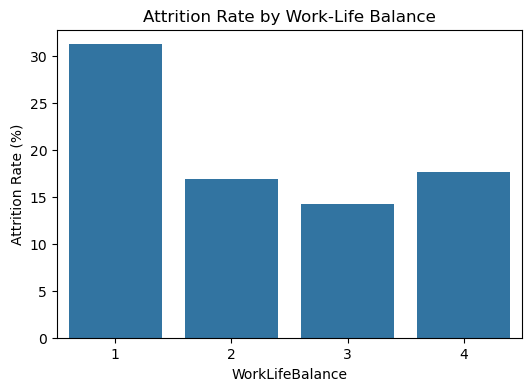

In [18]:
wlb_attrition = calculate_attrition_rate(df, 'WorkLifeBalance')

plt.figure(figsize=(6,4))
sns.barplot(x='WorkLifeBalance', y='AttritionRate', data=wlb_attrition)
plt.title("Attrition Rate by Work-Life Balance")
plt.ylabel("Attrition Rate (%)")
plt.show()

In [19]:
calculate_attrition_rate(df, 'JobRole')

Attrition,JobRole,No,Yes,AttritionRate
0,Healthcare Representative,122,9,6.870229
1,Human Resources,40,12,23.076923
2,Laboratory Technician,197,62,23.938224
3,Manager,97,5,4.901961
4,Manufacturing Director,135,10,6.896552
5,Research Director,78,2,2.500000
6,Research Scientist,245,47,16.095890
7,Sales Executive,269,57,17.484663
8,Sales Representative,50,33,39.759036


In [20]:
calculate_attrition_rate(df, 'Department')

Attrition,Department,No,Yes,AttritionRate
0,Human Resources,51,12,19.047619
1,Research & Development,828,133,13.839750
2,Sales,354,92,20.627803


In [21]:
df['YearsAtCompany'].mean()

np.float64(7.0081632653061225)